<h1 style="color:blue">Imbalance Technique: Ensemble Methods & Weights</h1>

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

# import library to ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1 style="color: red;">Dataset Details</h1>
  <ul style="list-style-type: none; padding-left: 20px;">
    <h3><li style="color: green;">Name : Credit-card-Fraud Detection-Imbalanced-Dataset</li></h3>
   <h3><li style="color: green;">URL : https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset</li></h3>
  </ul>

In [2]:
path = "../Datasets/credit_dataset.csv"
data = pd.read_csv(path)
data.head()

Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
0           0  5008806      M   Y       Y            0  112500.0   
1           1  5008808      F   N       Y            0  270000.0   
2           2  5008809      F   N       Y            0  270000.0   
3           3  5008810      F   N       Y            0  270000.0   
4           4  5008811      F   N       Y            0  270000.0   

            INCOME_TYPE                 EDUCATION_TYPE           FAMILY_TYPE  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate  Secondary / secondary special  Single / not married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

          HOUSE_TYPE  FLAG_MOBIL  WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  \
0  House / apartment           1           0      0       0          2.0   
1  House / apartment           1           0      1       1          1.0   
2  House / apartment           1           0      1       1          1.0   
3  House / apartment           1           0      1       1          1.0   
4  House / apartment           1           0      1       1          1.0   

   BEGIN_MONTH  AGE  YEARS_EMPLOYED  TARGET  
0           29   59               3       0  
1            4   52               8       0  
2           26   52               8       0  
3           26   52               8       0  
4           38   52               8       0

In [5]:
label = "TARGET"
data.drop(columns=["ID", "Unnamed: 0"], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  object 
 1   CAR             25134 non-null  object 
 2   REALITY         25134 non-null  object 
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

# Imbalance Data
<h2 style="color:green">Here in given plot we can see that the dataset is highly imbalanced with only few of target class(FRAUD</h2>

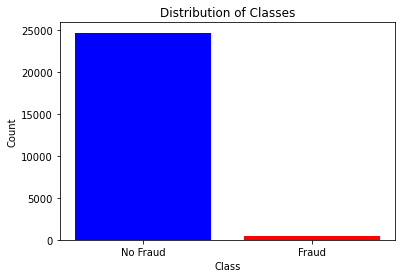

In [7]:
# imbalance
target_counts = data['TARGET'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'])
plt.xticks(target_counts.index, ['No Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

# Data Cleaning

In [8]:
duplicates = data[data.duplicated()]
print(len(duplicates))
data.drop_duplicates(inplace=True, keep="first")
duplicates = data[data.duplicated()]
print(len(duplicates))

2938
0


## Handling Null Values

In [9]:
data.isna().sum()

GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

<h1 style="color:red">EDA</h1>

In [19]:
def EDA(df):
    print("Descriptive Statistics:")
    print(data.describe())
    
    # Display the distribution of the target variable
    sns.countplot(x='TARGET', data=data)
    plt.title('Distribution of Target Variable')
    plt.show()

    # Display the distribution of categorical variables
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        sns.countplot(x=col, data=data)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Display box plots for numerical columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='TARGET', y=col, data=data)
        plt.title(f'Boxplot of {col} by Target Variable')
        plt.show()

    # Display the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    
    # Display 5-number summary for numerical columns
    print("5-Number Summary for Numerical Columns:")
    for col in numerical_cols:
        print(f"Column: {col}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Mode: {df[col].mode()[0]}")
        print(f"25th Percentile (Q1): {df[col].quantile(0.25)}")
        print(f"50th Percentile (Q2, Median): {df[col].quantile(0.5)}")
        print(f"75th Percentile (Q3): {df[col].quantile(0.75)}")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")
        print()

Descriptive Statistics:
        NO_OF_CHILD        INCOME  FLAG_MOBIL    WORK_PHONE         PHONE  \
count  22196.000000  2.219600e+04     22196.0  22196.000000  22196.000000   
mean       0.514147  1.938834e+05         1.0      0.274148      0.292215   
std        0.792126  1.032757e+05         0.0      0.446094      0.454791   
min        0.000000  2.700000e+04         1.0      0.000000      0.000000   
25%        0.000000  1.350000e+05         1.0      0.000000      0.000000   
50%        0.000000  1.800000e+05         1.0      0.000000      0.000000   
75%        1.000000  2.250000e+05         1.0      1.000000      1.000000   
max       19.000000  1.575000e+06         1.0      1.000000      1.000000   

             E_MAIL   FAMILY SIZE   BEGIN_MONTH           AGE  YEARS_EMPLOYED  \
count  22196.000000  22196.000000  22196.000000  22196.000000    22196.000000   
mean       0.100964      2.295774     25.988151     40.515048        7.189043   
std        0.301288      0.951238     1

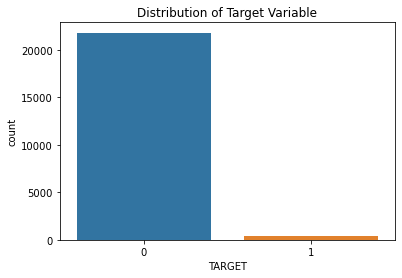

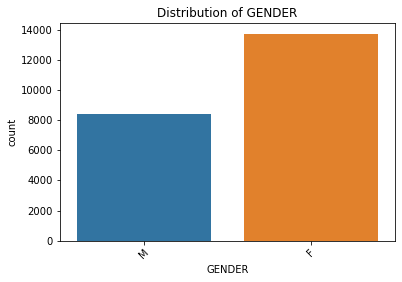

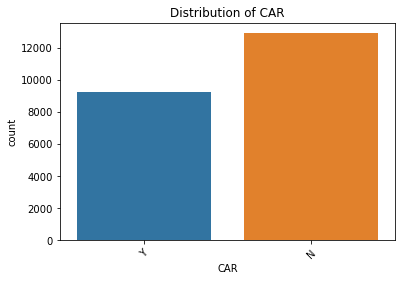

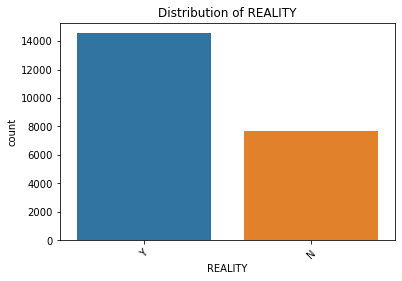

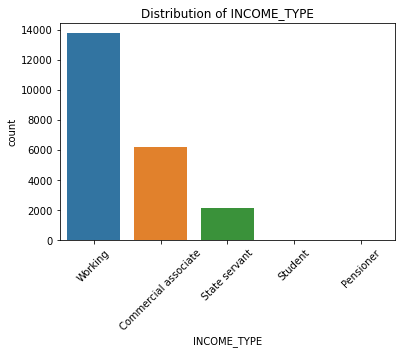

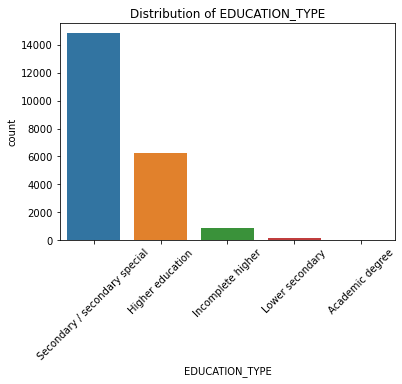

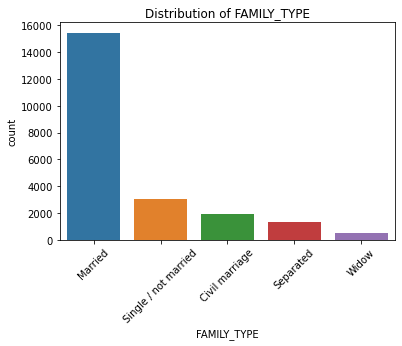

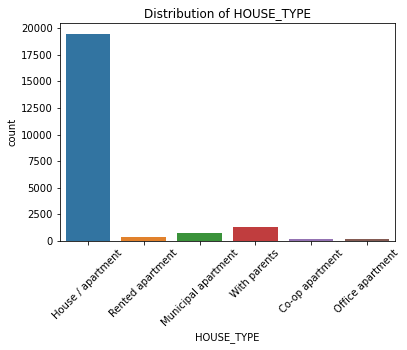

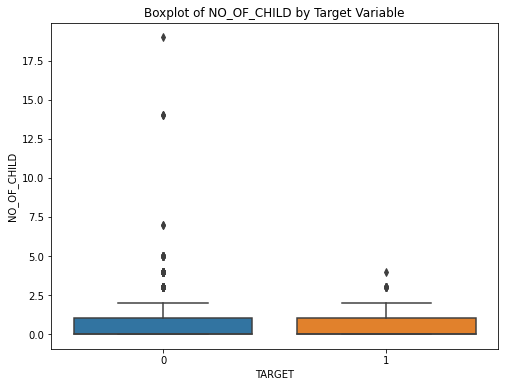

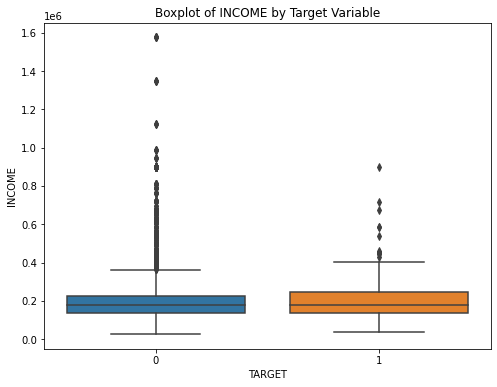

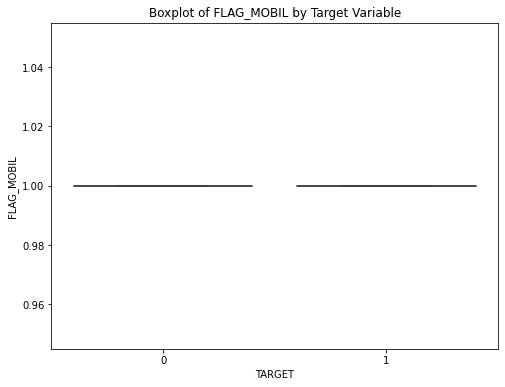

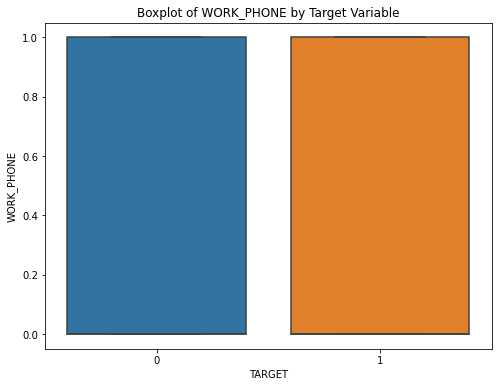

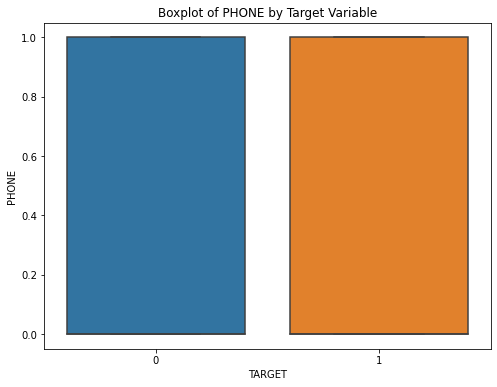

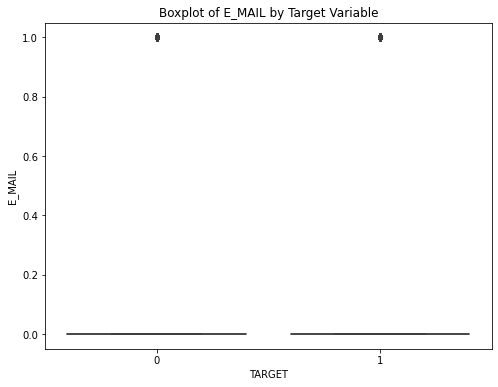

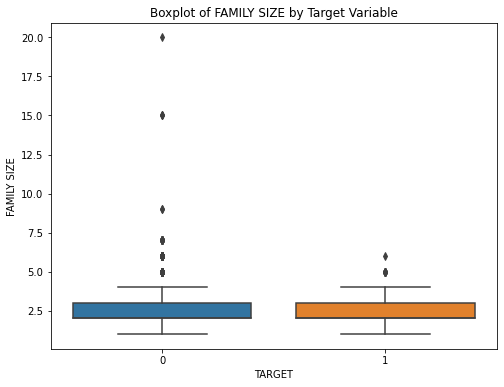

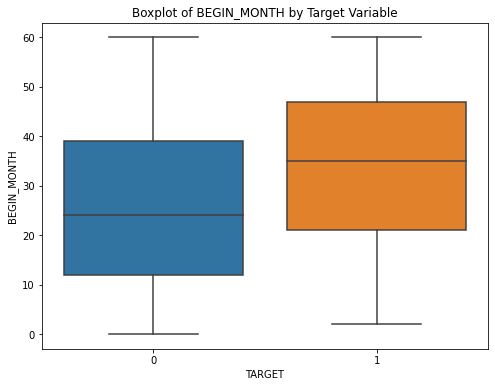

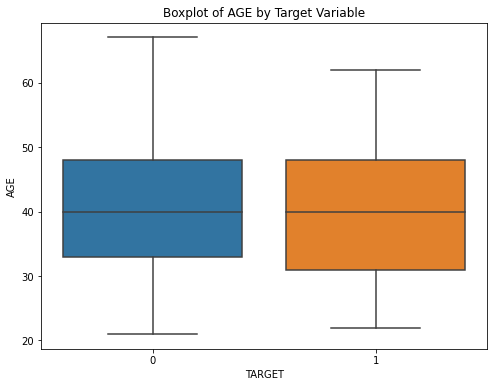

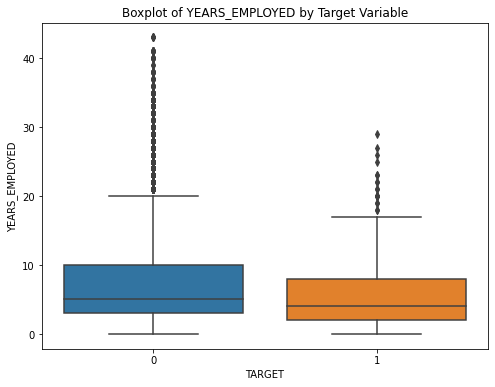

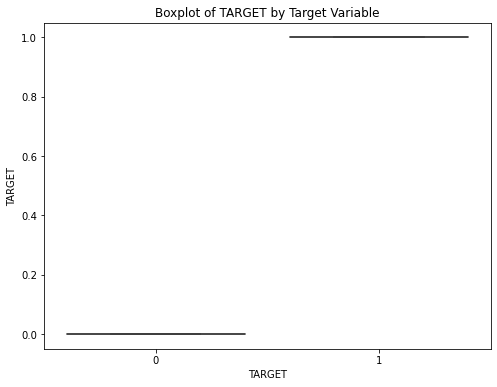

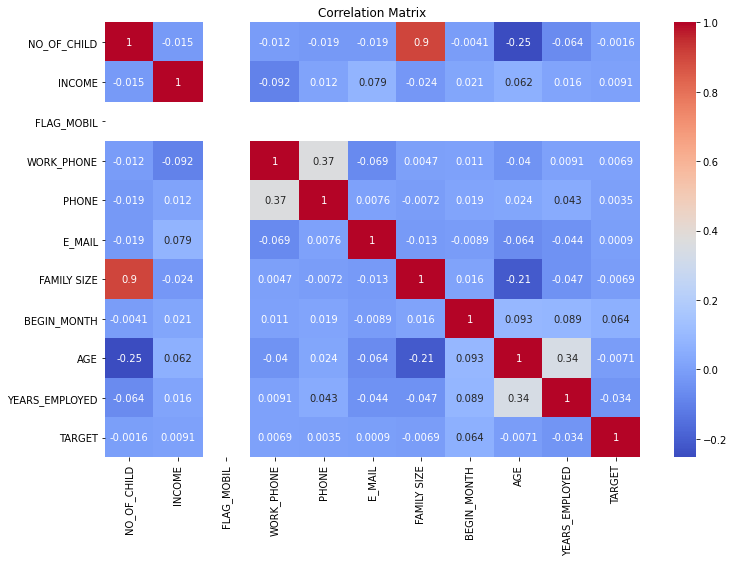

5-Number Summary for Numerical Columns:
Column: NO_OF_CHILD
Mean: 0.5141466930978554
Median: 0.0
Mode: 0
25th Percentile (Q1): 0.0
50th Percentile (Q2, Median): 0.0
75th Percentile (Q3): 1.0
Min: 0
Max: 19

Column: INCOME
Mean: 193883.41131284917
Median: 180000.0
Mode: 135000.0
25th Percentile (Q1): 135000.0
50th Percentile (Q2, Median): 180000.0
75th Percentile (Q3): 225000.0
Min: 27000.0
Max: 1575000.0

Column: FLAG_MOBIL
Mean: 1.0
Median: 1.0
Mode: 1
25th Percentile (Q1): 1.0
50th Percentile (Q2, Median): 1.0
75th Percentile (Q3): 1.0
Min: 1
Max: 1

Column: WORK_PHONE
Mean: 0.27414849522436474
Median: 0.0
Mode: 0
25th Percentile (Q1): 0.0
50th Percentile (Q2, Median): 0.0
75th Percentile (Q3): 1.0
Min: 0
Max: 1

Column: PHONE
Mean: 0.2922148134799063
Median: 0.0
Mode: 0
25th Percentile (Q1): 0.0
50th Percentile (Q2, Median): 0.0
75th Percentile (Q3): 1.0
Min: 0
Max: 1

Column: E_MAIL
Mean: 0.10096413768246532
Median: 0.0
Mode: 0
25th Percentile (Q1): 0.0
50th Percentile (Q2, Median)

In [20]:
EDA(data)

# Encoding the Categorical data points

In [40]:
# as we see that our dataset have cateforical data so we have to encode it
categorical_features = data[data.select_dtypes(include=['object']).columns.tolist()]
label_encoder = LabelEncoder()

for feature in categorical_features:
    data.loc[:, feature] = label_encoder.fit_transform(data[feature])

In [41]:
data.head()

GENDER CAR REALITY  NO_OF_CHILD    INCOME INCOME_TYPE EDUCATION_TYPE  \
0      1   1       1            0  112500.0           4              4   
1      0   0       1            0  270000.0           0              4   
2      0   0       1            0  270000.0           0              4   
4      0   0       1            0  270000.0           0              4   
5      1   1       1            0  270000.0           4              1   

  FAMILY_TYPE HOUSE_TYPE  FLAG_MOBIL  WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  \
0           1          1           1           0      0       0          2.0   
1           3          1           1           0      1       1          1.0   
2           3          1           1           0      1       1          1.0   
4           3          1           1           0      1       1          1.0   
5           1          1           1           1      1       1          2.0   

   BEGIN_MONTH  AGE  YEARS_EMPLOYED  TARGET  
0           29   59               3       0  
1            4   52               8       0  
2           26   52               8       0  
4           38   52               8       0  
5            5   46               2       0

# Feature Selection Technique

In [42]:
X = data.drop(columns=[label])
y = data[label]

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [43]:
# Get feature importances
from sklearn.feature_selection import SelectFromModel

feature_importances = dt_classifier.feature_importances_
feature_importances

array([0.0142623 , 0.03405386, 0.02589195, 0.02375224, 0.12634239,
       0.05749935, 0.0278636 , 0.05686108, 0.0228922 , 0.        ,
       0.0289348 , 0.03065236, 0.01252247, 0.03394569, 0.2663037 ,
       0.13739066, 0.10083137])

In [44]:
# Select features based on importance scores
selected_features = SelectFromModel(dt_classifier, threshold=0.05)  # Adjust threshold as needed
selected_features.fit(X, y)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.05)

In [45]:
# Get selected feature indices
selected_feature_indices = selected_features.get_support(indices=True)
selected_feature_indices

array([ 4, 14, 15, 16], dtype=int64)

In [46]:
# # Select the features from the original dataset
selected_X = X.iloc[:, selected_feature_indices]
selected_X.columns

Index(['INCOME', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'], dtype='object')

In [47]:
selected_X.head()

INCOME  BEGIN_MONTH  AGE  YEARS_EMPLOYED
0  112500.0           29   59               3
1  270000.0            4   52               8
2  270000.0           26   52               8
4  270000.0           38   52               8
5  270000.0            5   46               2

# Data Transformation

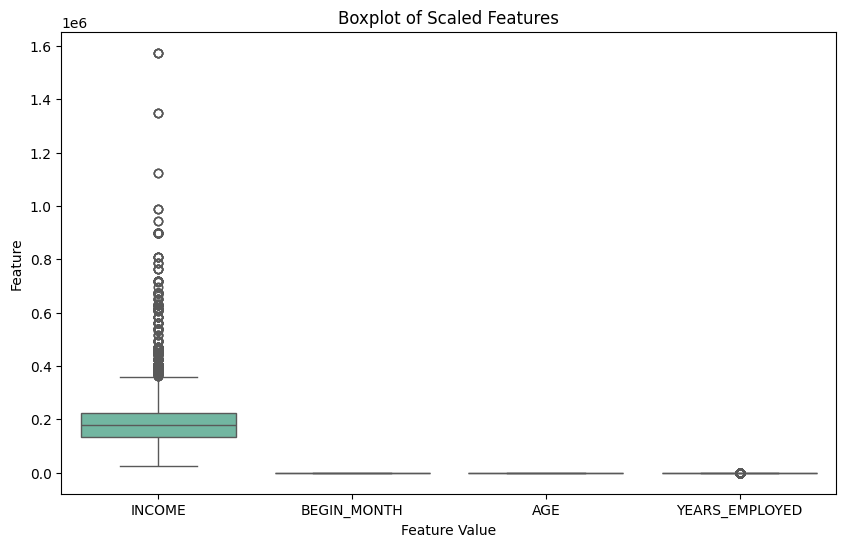

In [48]:
def plot_box(df):
    # Plot boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient="v", palette="Set2")
    plt.title("Boxplot of Scaled Features")
    plt.xlabel("Feature Value")
    plt.ylabel("Feature")
    plt.show()

plot_box(selected_X)

In [49]:
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(selected_X)

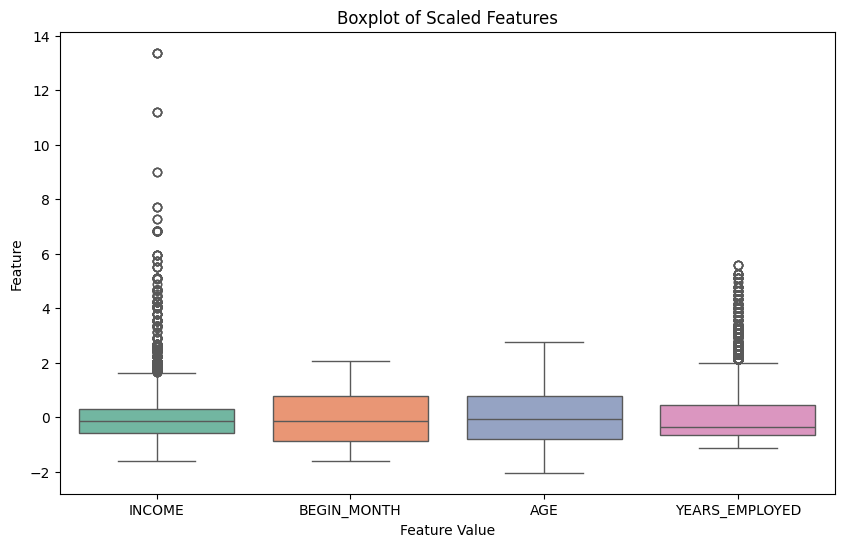

In [50]:
df_scaled = pd.DataFrame(X_scaled, columns=selected_X.columns)
plot_box(df_scaled)

# Different classification Models

<h1 style="color: blue;">Selected Classifcation Models:</h1>
  <ol>
    <h3><li style="color: green;">KNN</li></h3>
   <h3><li style="color: green;">SVM </li></h3>
    <h3><li style="color: green;">Naive Bayes</li></h3>
   <h3><li style="color: green;">Decision Tree</li></h3>
    <h3><li style="color: green;">Logistic Regression</li></h3>
  </ol>


# Modeling

<h1 style="color: red;">With & Without Cross Validation</h1>

In [ ]:
# data splitting
def manual_data_splitting(df, target):
    y = df_tranform[target]
    X = df_tranform.drop(columns=[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    return X_train, X_test, y_train, y_test

In [51]:
def get_split(X, y):
    return train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)
X = X_scaled

<h1 style="color: red;">Confusion matrix Function</h1>

In [52]:
def plot_cm(cm):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

<h1 style="color: indigo;">Function: Classification Report & Confusion Matric</h1>

In [53]:
def train_test_visualize(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    cm = confusion_matrix(y, y_pred)
    plot_cm(cm)
    # Generate classification report
    report = classification_report(y, y_pred, zero_division=1)
    print("Classification Report:\n", report)

<h1 style="color: Red;">Baseline Execution</h1>

<h2 style="color: blue;">1- KNN</h2>

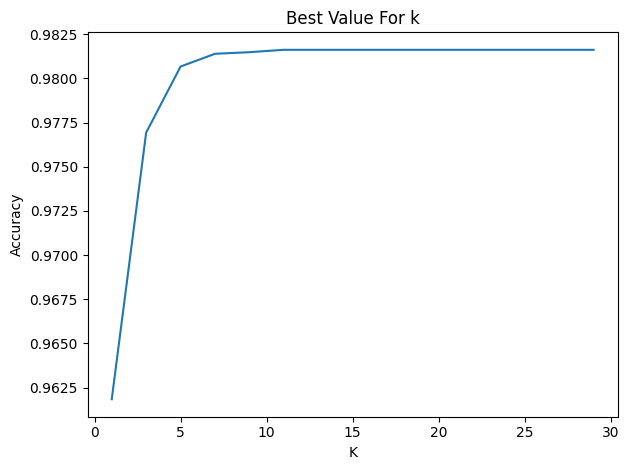

In [54]:
def plot_knn(X, y):
  # Define a list of k values to try
  k_values = range(1, 30, 2)

  # Train KNN classifiers with different k values
  scores = list()
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    score = accuracy_score(y, y_pred)
    scores.append(score)

  plt.plot(k_values, scores)
  plt.title("Best Value For k")
  plt.xlabel('K')
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

  return k_values[scores.index(max(scores))]
k = plot_knn(X, y)

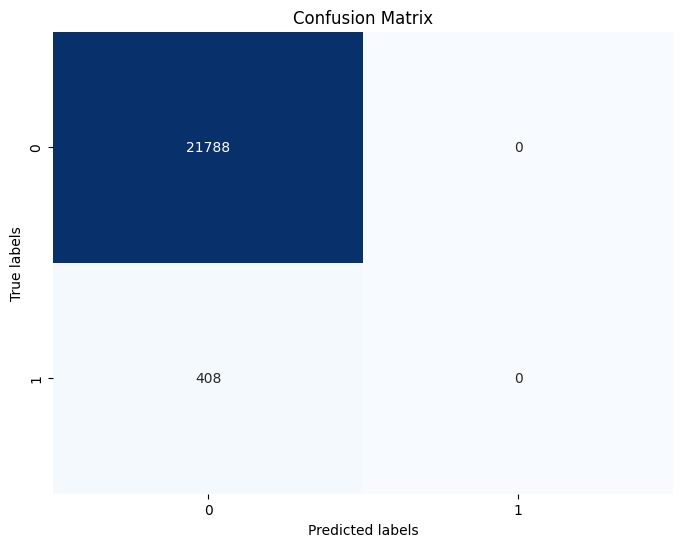

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [55]:
def run_knn(X, y):
  knn = KNeighborsClassifier(n_neighbors=k)
  train_test_visualize(knn, X, y)

run_knn(X, y)

<h2 style="color: blue;">2- Logistic Regression</h2>

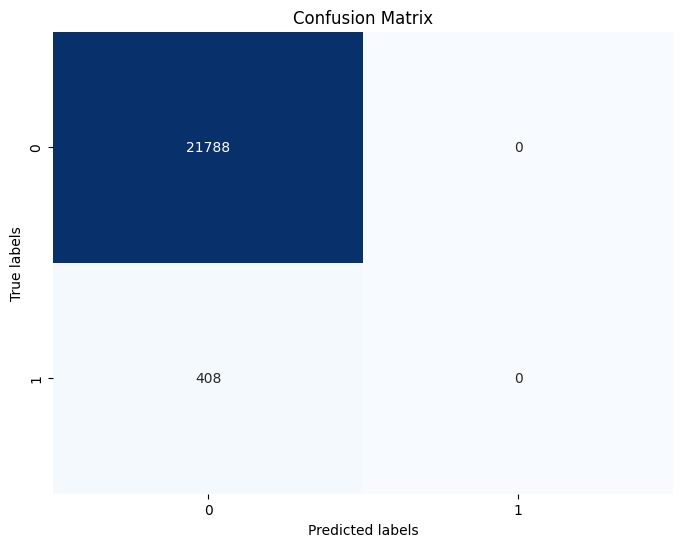

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [56]:
from sklearn.linear_model import LogisticRegression

def run_lr(X, y):
  lr = LogisticRegression(max_iter=500)
  train_test_visualize(lr, X, y)

run_lr(X, y)

<h2 style="color: blue;">3- Decision Tree Classifier</h2>

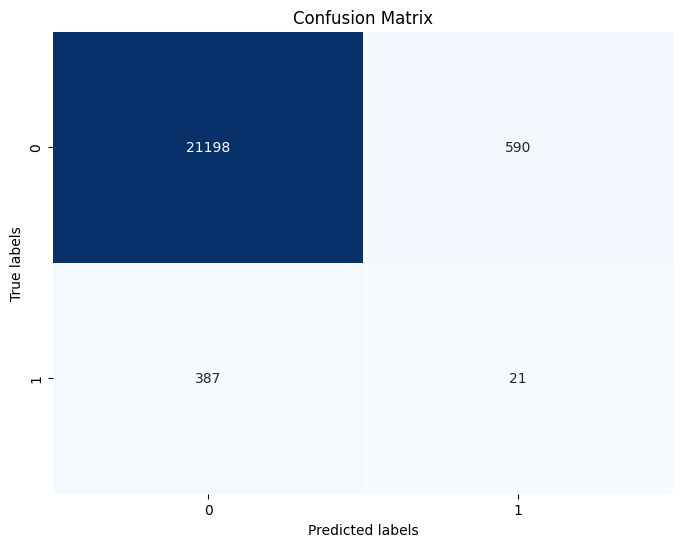

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     21788
           1       0.03      0.05      0.04       408

    accuracy                           0.96     22196
   macro avg       0.51      0.51      0.51     22196
weighted avg       0.96      0.96      0.96     22196



In [57]:
from sklearn.tree import DecisionTreeClassifier

def run_tree(X, y):
  tree_model = DecisionTreeClassifier()
  train_test_visualize(tree_model, X, y)

run_tree(X, y)

<h2 style="color: blue;">4- SVM</h2>

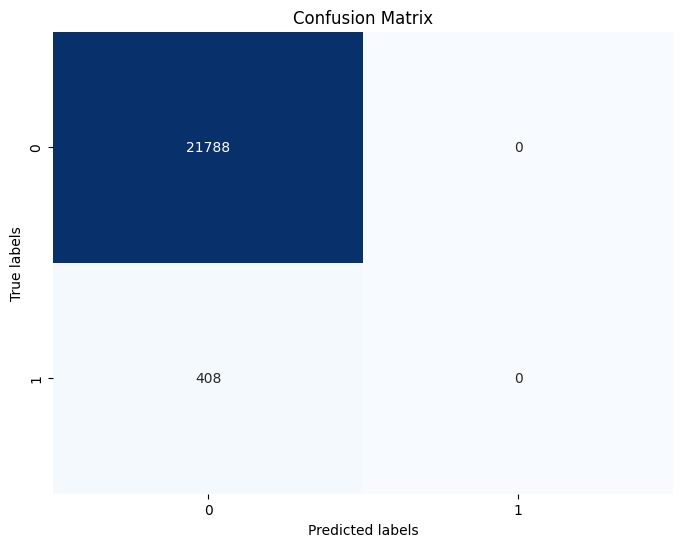

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [58]:
from sklearn.svm import SVC

def run_svm(X, y):
  # Initialize SVM classifier
  svm_model = SVC(kernel='linear')

  train_test_visualize(svm_model, X, y)

run_svm(X, y)

<h2 style="color: blue;">5- Naive Bayes</h2>

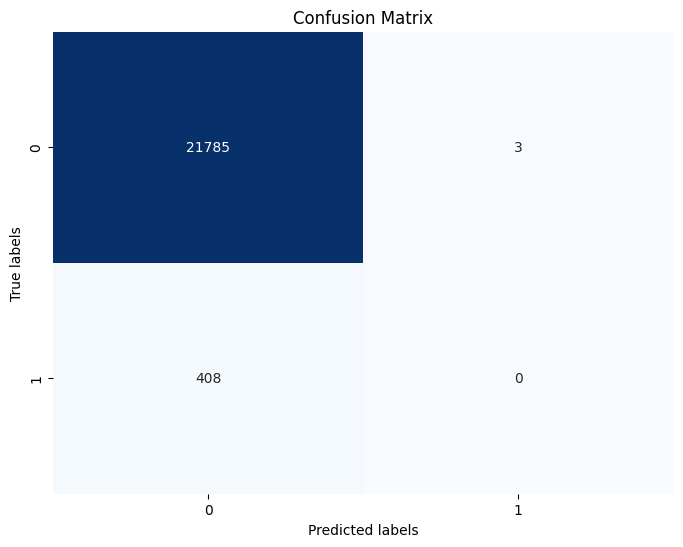

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       0.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.49      0.50      0.50     22196
weighted avg       0.96      0.98      0.97     22196



In [59]:
from sklearn.naive_bayes import GaussianNB

def run_nb(X, y):
    nb_classifier = GaussianNB()
    train_test_visualize(nb_classifier, X, y)

run_nb(X, y)

<h1 style="color: red;">Class Imbalance Technique</h1>
<h2 style="color: blue;">Ensembling Methods and Weights</h2>

In [68]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights
class_weights = calculate_class_weights(y)

<h1 style="color:blue">1- Logistic Regression</h1>

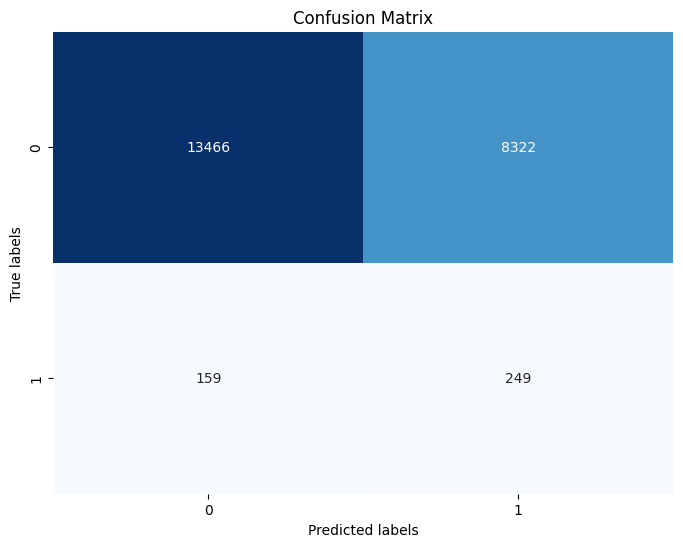

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.76     21788
           1       0.03      0.61      0.06       408

    accuracy                           0.62     22196
   macro avg       0.51      0.61      0.41     22196
weighted avg       0.97      0.62      0.75     22196



In [70]:
from sklearn.linear_model import LogisticRegression

# calculated class_weights
logreg = LogisticRegression(class_weight=class_weights)
train_test_visualize(logreg, X, y)

<h1 style="color: blue;">2- SVM</h1>

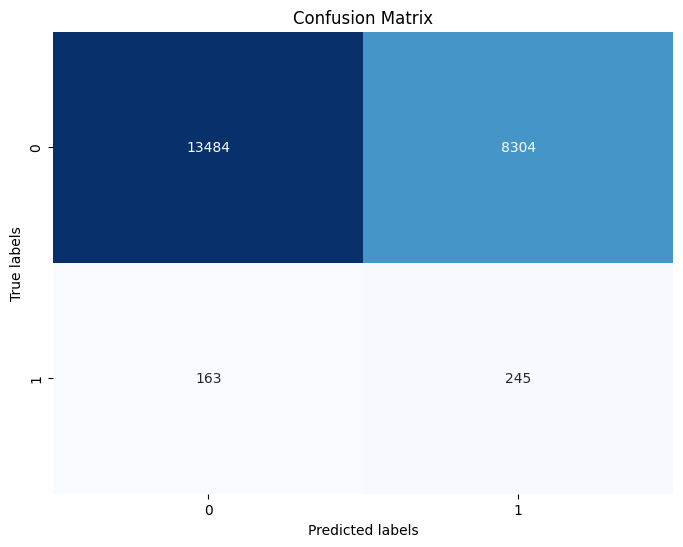

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.76     21788
           1       0.03      0.60      0.05       408

    accuracy                           0.62     22196
   macro avg       0.51      0.61      0.41     22196
weighted avg       0.97      0.62      0.75     22196



In [78]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', class_weight=class_weights)

train_test_visualize(svm_model, X, y)

<h1 style="color: blue;">3- Gradient Boosting</h1>

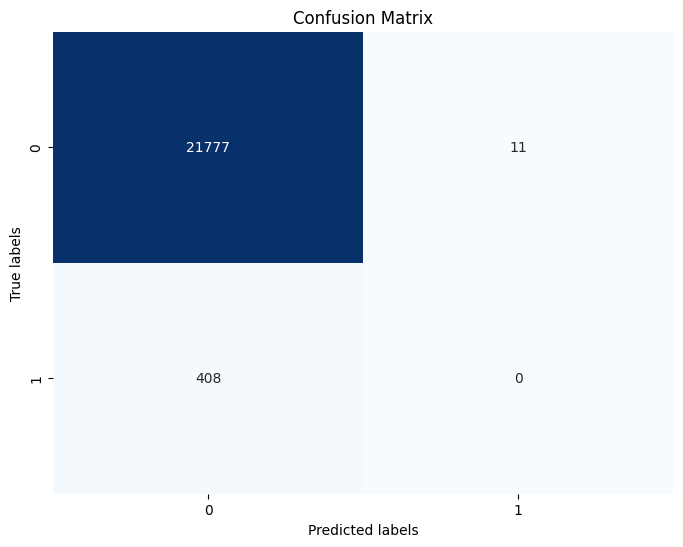

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       0.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.49      0.50      0.50     22196
weighted avg       0.96      0.98      0.97     22196



In [71]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50)
train_test_visualize(clf, X, y)

<h1 style="color: blue;">4- Random Forest</h1>

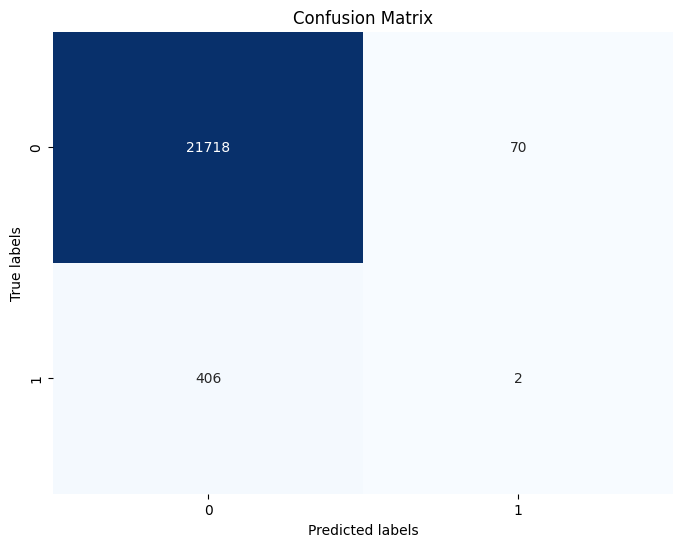

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       0.03      0.00      0.01       408

    accuracy                           0.98     22196
   macro avg       0.50      0.50      0.50     22196
weighted avg       0.96      0.98      0.97     22196



In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight=class_weights)
train_test_visualize(clf, X, y)

<h2 style="color:blue">5- AdaBoost Classifier</h2>

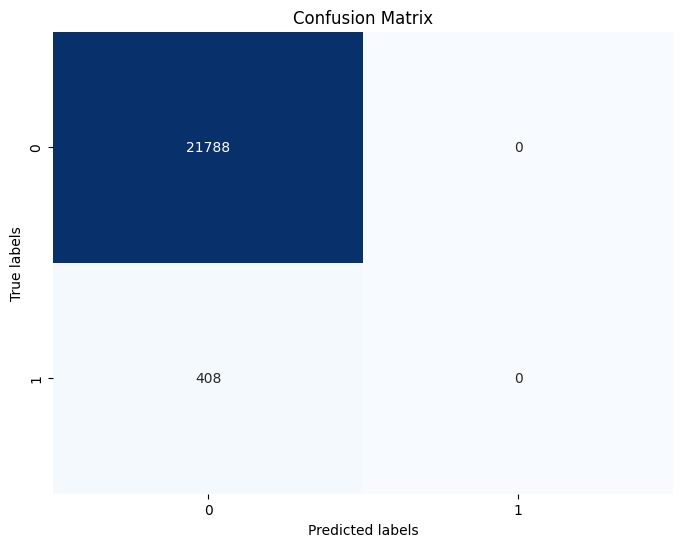

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [74]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")
train_test_visualize(clf, X, y)

<h2 style="color:blue">Balanced Random Forest Classifier</h2>

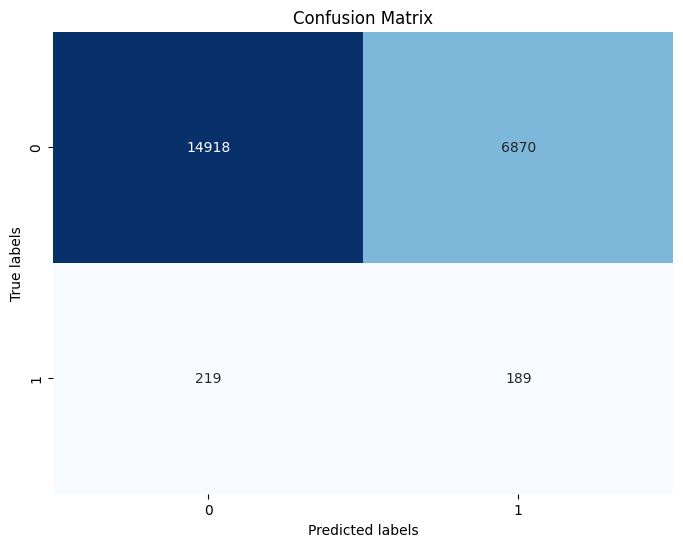

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81     21788
           1       0.03      0.46      0.05       408

    accuracy                           0.68     22196
   macro avg       0.51      0.57      0.43     22196
weighted avg       0.97      0.68      0.79     22196



In [75]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=42, sampling_strategy='all', 
                                           replacement=False, bootstrap=True, class_weight=class_weights)
train_test_visualize(model, X, y)

## Easy Ensemble Classifier

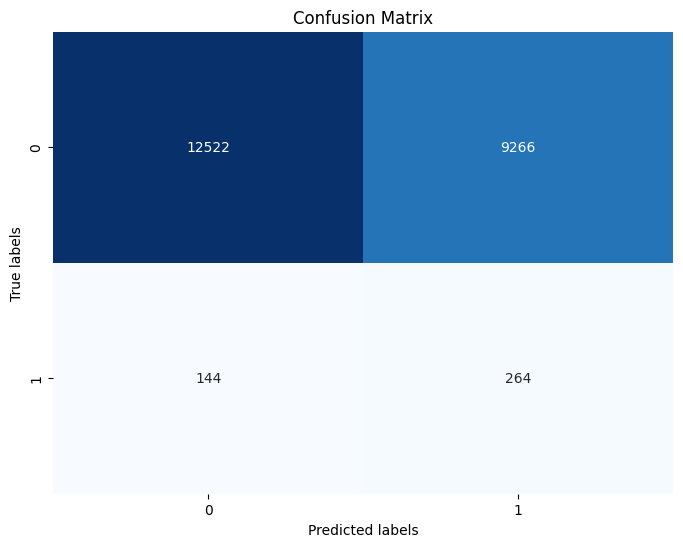

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.57      0.73     21788
           1       0.03      0.65      0.05       408

    accuracy                           0.58     22196
   macro avg       0.51      0.61      0.39     22196
weighted avg       0.97      0.58      0.71     22196



In [77]:
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(n_estimators=100, random_state=42)
train_test_visualize(model, X, y)

<h1 style="color:red">Conculsion</h1>

<h3 style="color:green">-> The ensemble technique has been applied to five classification algorithms on a credit card fraud detection dataset and i show results for both before and after applying tthe ensemble technique.
<br><br>
-> Before the ensemble technique all algorithms that i applied in this notebook struggled to correctly classify the minority class that is indicated by their low recall values for class 1. This led to imbalanced F1-scores and overall suboptimal performance.
 <br><br>
 ->But after applying the ensemble technique, there were notable improvements in recall for the minority class for Logistic Regression,SVM Gradient Boosting, and Random Forest. However precision for the minority class dropped significantly for Logistic Regression and SVM that is indicating a trade-off between precision and recall.
    Gradient Boosting, Random Forest, and AdaBoost Classifier showed no improvement in recall for the minority class, indicating limited effectiveness of the ensemble technique for these algorithms on this dataset.
</h3>